<a href="https://colab.research.google.com/github/harikarupu/Hariprasath/blob/main/Hariaiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%


Evaluating KNN:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



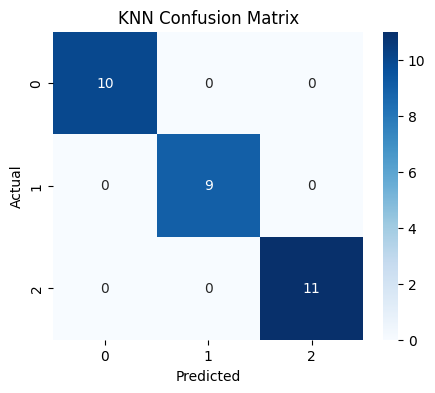


Evaluating Decision Tree:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



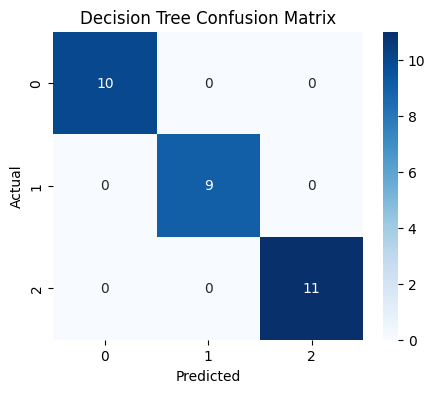


Evaluating Random Forest:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



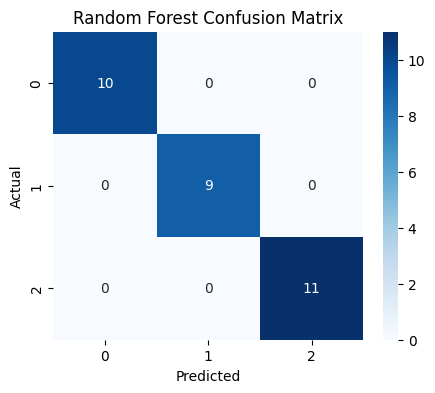

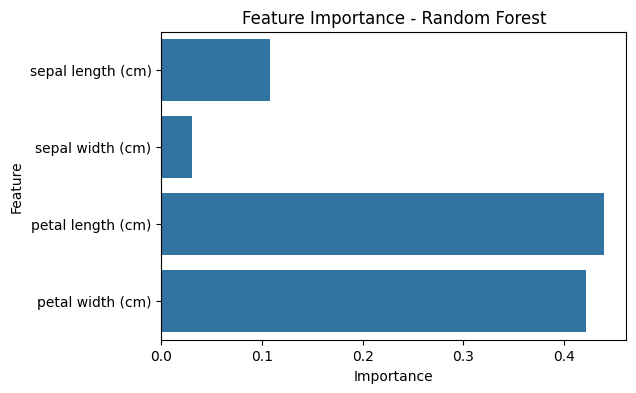

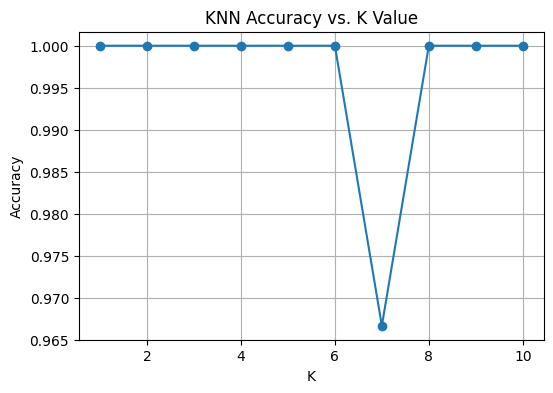


All tasks completed. Project ready for submission!


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Dataset info
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# Scatter matrix
fig = px.scatter_matrix(df, dimensions=data.feature_names, color='species', title="Iris Feature Scatter Matrix")
fig.show()

# Split data
X = df.drop("species", axis=1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate models
models = {'KNN': knn, 'Decision Tree': dtree, 'Random Forest': rf}
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Feature importance
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# KNN tuning
scores = []
k_range = range(1, 11)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure(figsize=(6, 4))
plt.plot(k_range, scores, marker='o')
plt.title("KNN Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("\nAll tasks completed. Project ready for submission!")